### INFO 5502 Final Exam (05/12/2022, 500 points in total)

<span style='background:yellow'>**Question 1 (100 pt).**</span> We want to create a birthday frequency graph using the data on births in the United States, provided by the Centers for Disease Control (CDC). You can download the data from my GitHub link:https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/births.csv 

Please visualize the data as the following figure using python (you can use any data visualization packages):

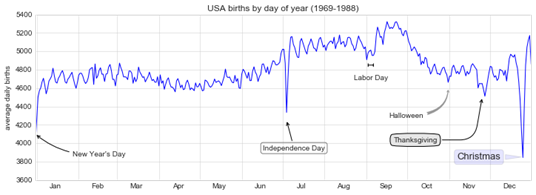

![title](https://github.com/suthapalliuday/Rough-Work/blob/main/SciBERT_cm.png)

In [1]:
#### You code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data = pd.read_csv('births.csv')

In [3]:
data.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


<ipython-input-4-e0c4820bb3df>:5: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  births['day'] = births['day'].astype(int)

<ipython-input-4-e0c4820bb3df>:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

  births_by_date.index = [pd.datetime(2012, month, day)


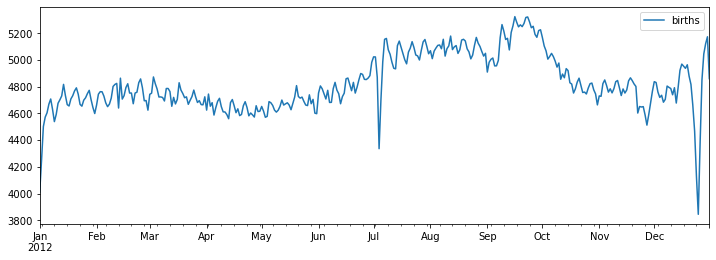

In [4]:
quartiles = np.percentile(data['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = data.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

<span style='background:yellow'>**Question 2 (100 pt).**</span> Write a python program to evaluate the text classification performance using accuracy, precision, recall, and f1 score. 

Accuracy = (TP + TN) / (TP+ TN+ FP+ FN)

Recall = (TP) / (TP+FN)

Precision = (TP) / (TP+FP)

F1 Score = (2*Precision*Recall) / (Precision + Recall)

Here is the confusion matrix of a text classfication task (six categories) on the testing data. 

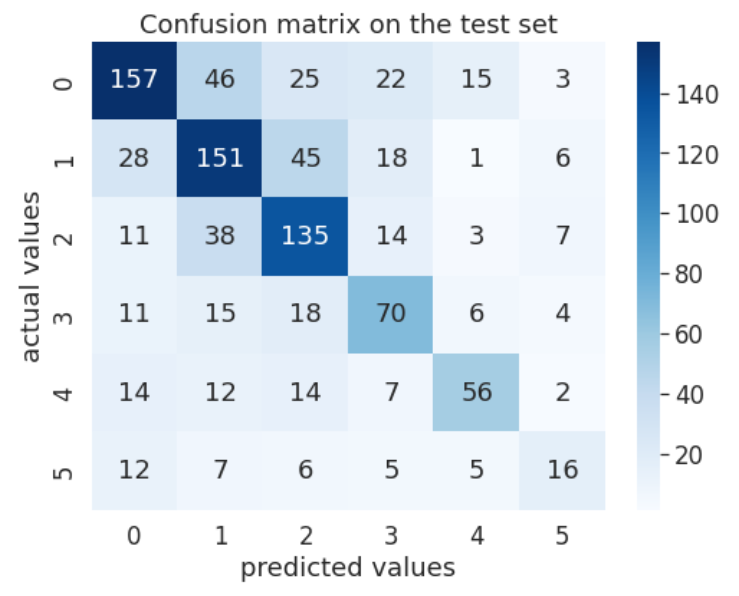

In [46]:
#### You code here


TP = 157
FP = 66
FN = 121
TN = 553

Accuracy = (TP + TN) / (TP+ TN+ FP+ FN)
Recall = (TP) / (TP+FN)
Precision = (TP) / (TP+FP)
F1_score = (2*Precision*Recall) / (Precision + Recall)

print("accuracy" , Accuracy)
print("recall", Recall)
print("precision", Precision)
print("f1_score",F1_score)



accuracy 0.7915273132664437

recall 0.564748201438849

precision 0.7040358744394619

f1_score 0.626746506986028


In [49]:
conf_matrix = [[157,46,25,22,15,3],
              [25,131,45,18,1,6],
              [13,38,105,14,3,7],
              [13,15,18,70,6,4],
              [14,12,14,7,56,2],
              [12,7,6,5,5,14]]

conf = np.array(conf_matrix)



for i in range(len(conf)):
    
    accuracy = 0
    precision = 0
    recall = 0
    f1_score = 0
    
    TP = conf[i,i]
    FP = conf[i,:].sum() - TP
    FN = conf[:,i].sum() - TP
    TN = conf.sum().sum() - (TP+FP+FN)
    
    accuracy = (TP+TN)/conf.sum().sum()
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*precision*recall/(precision+recall)
    
    print(f'The accuracy of class{i} is {accuracy}')
    print(f'The precision of class{i} is {precision}')
    print(f'The recall of class{i} is {recall}')
    print(f'The F1-Score of class{i} is {f1_score}')
    print()

The accuracy of class0 is 0.8029350104821803

The precision of class0 is 0.585820895522388

The recall of class0 is 0.6709401709401709

The F1-Score of class0 is 0.6254980079681274



The accuracy of class1 is 0.7767295597484277

The precision of class1 is 0.5796460176991151

The recall of class1 is 0.5261044176706827

The F1-Score of class1 is 0.5515789473684211



The accuracy of class2 is 0.8081761006289309

The precision of class2 is 0.5833333333333334

The recall of class2 is 0.49295774647887325

The F1-Score of class2 is 0.534351145038168



The accuracy of class3 is 0.8721174004192872

The precision of class3 is 0.5555555555555556

The recall of class3 is 0.5147058823529411

The F1-Score of class3 is 0.5343511450381679



The accuracy of class4 is 0.9171907756813418

The precision of class4 is 0.5333333333333333

The recall of class4 is 0.6511627906976745

The F1-Score of class4 is 0.5863874345549738



The accuracy of class5 is 0.940251572327044

The precision of class5 is 0.28

In [50]:
def calculate(TP,TN,FP,FN,c):
    Accuracy = (TP + TN) / (TP+ TN+ FP+ FN)
    Recall = (TP) / (TP+FN)
    Precision = (TP) / (TP+FP)
    F1_score = (2*precision*recall) / (precision + recall)
    
    print("------------")
    print("class ",format(c))
    print("accuracy" , Accuracy)
    print("recall", Recall)
    print("precision", Precision)
    print("f1_score",F1_score)
    print("------------")
    
TP1=157
TN1=399
FP1=56
FN1	=87

TP2=131
TN2	=414
FP2	=116
FN2	=77

TP3	=105
TN3	=450
FP3	=98
FN3	=65

TP4	=70
TN4	=515
FP4	=66
FN4	=45

TP5	=56
TN5	=519
FP5	=20
FN5	=59

TP6	=14
TN6	=497
FP6	=27
FN6	=42

calculate(TP1,TN1,FP1,FN1,1)
calculate(TP2,TN2,FP2,FN2,2)
calculate(TP3,TN3,FP3,FN3,3)
calculate(TP4,TN4,FP4,FN4,4)
calculate(TP5,TN5,FP5,FN5,5)
calculate(TP6,TN6,FP6,FN6,6)

------------

class  1

accuracy 0.7954220314735336

recall 0.6434426229508197

precision 0.7370892018779343

f1_score 0.3294117647058823

------------

------------

class  2

accuracy 0.7384823848238482

recall 0.6298076923076923

precision 0.5303643724696356

f1_score 0.3294117647058823

------------

------------

class  3

accuracy 0.7729805013927576

recall 0.6176470588235294

precision 0.5172413793103449

f1_score 0.3294117647058823

------------

------------

class  4

accuracy 0.8405172413793104

recall 0.6086956521739131

precision 0.5147058823529411

f1_score 0.3294117647058823

------------

------------

class  5

accuracy 0.8792048929663608

recall 0.48695652173913045

precision 0.7368421052631579

f1_score 0.3294117647058823

------------

------------

class  6

accuracy 0.8810344827586207

recall 0.25

precision 0.34146341463414637

f1_score 0.3294117647058823

------------


<span style='background:yellow'>**Question 3 (200 pt).**</span> 

Part A: Given Inetd dataset, an intrusion detection dataset that contains 2 columns. The first column represents a process ID number (PID) and the second column represents a system call. The goal is to extract the entire system call sequence by its PID, then tokenize and parse each sequence into 25-grams. After this, we’ll split the data into training and testing sets. Next, we ensure data quality in the training dataset by removing duplicate sequences within each class and overlapped sequences between both classes. To ensure a fair evaluation, we also clean the testing set by repeating the previous step. You will implement a Decision Tree model to train and test on the training set and testing set that we just clean. 


Part B: As the data type is sequential, we want to know how similar the sequences from both classes are and visualize how the similarity scores vary in different sequence lengths. Compute a cosine similarity score of 100 random pairs from both classes and get a median cosine similarity. Repeat this step in different sequence lengths (5, 10, 15, and 20). Plot a line chart to visualize how the median cosine similarities vary through sequence lengths of 5 to 25. 

You can download the datasets from github: https://github.com/unt-iialab/info5502-spring2022/tree/main/finalexam/q4


Step by step instructions and questions:

(1)(30 points) Attached are the Normal and Intrusion data folders. Read in the data and store them in two separate dataframes. Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string. 

(2)(30 points) Parse an entire sequence into smaller sequences of size 25. (Hint: Use word_tokenize and ngrams from nltk library to parse).

(3)(30 points) Add labels to the data, and partition the labeled data into training data and testing data with a ratio of 70/30.

(4)(30 points) As the dataset has a lot of duplicate sequences, make sure that the testing data only contain unique sequences and that these sequences do not exist in the training data. Condense training data and testing data into two sets. Take the difference between the testing set and training set to remove the overlapped sequences from the testing data. 

(5)(30 points) The sequences from each class can be repetitive, and some of these sequences may have different labels. Therefore, we need to remove the duplicate sequences within each class and the overlapped sequences from the Intrusion class. Start out by separating the Normal class and Intrusion class in both training and testing data. Use the same concept in Question 4 to remove duplicate sequences and overlapped sequences from the training data.


(6)(50 points) Bootstrap the training data to get the same number of sequences from each class. Train and evaluate a Decision Tree model using the training data and testing data that we just clean. How is the performance?


In [17]:
#### You code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
%matplotlib inline
from pandas import DataFrame, Series





In [1]:
data1 = pd.read_csv('intrusion.csv')
data2 = pd.read_csv('normal.int')

<class 'NameError'>: name 'pd' is not defined

In [32]:
missing_value=["N/a","na",np.nan]
df=pd.read_csv('intrusion.csv', na_values=missing_value)

In [33]:
df.isnull().sum()

167 90    0
dtype: int64

In [34]:
df

,167 90
0,167 125
1,167 125
2,167 106
3,167 5
4,167 90
...,...
8365,4470 6
8366,4470 6
8367,4470 6
8368,4470 6


In [35]:
df.dropna()

,167 90
0,167 125
1,167 125
2,167 106
3,167 5
4,167 90
...,...
8365,4470 6
8366,4470 6
8367,4470 6
8368,4470 6


In [45]:
data1 = pd.read_csv('intrusion.csv')

data1.columns =['PId']
df1=pd.DataFrame(data1)
data2=pd.read_csv('normal.int')
data2.columns =['System_call']
df2=pd.DataFrame(data2)
df_complete=df1.append(df2)
dfn = df_complete.groupby('PId').agg(lambda x: x.tolist())

dfn.columns=['System_call']
dfn

,System_call
PId,
167 1,[nan]
167 106,"[nan, nan, nan, nan, nan, nan]"
167 125,"[nan, nan, nan, nan, nan, nan]"
167 136,[nan]
167 2,[nan]
...,...
4470 5,[nan]
4470 6,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4470 63,"[nan, nan, nan]"


In [23]:
plt.style.use('seaborn-whitegrid')

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to

[nltk_data]     C:\Users\ERIC\AppData\Roaming\nltk_data...

[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [43]:
from nltk import ngrams
from nltk import word_tokenize

dfn['System_call']

PId
167 1                                                  [nan]
167 106                       [nan, nan, nan, nan, nan, nan]
167 125                       [nan, nan, nan, nan, nan, nan]
167 136                                                [nan]
167 2                                                  [nan]
                                 ...                        
4470 5                                                 [nan]
4470 6     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
4470 63                                      [nan, nan, nan]
4470 90                                                [nan]
4470 91                                                [nan]
Name: System_call, Length: 353, dtype: object

In [52]:
import ast

In [54]:
from tokenize import tokenize, untokenize, NUMBER, STRING, NAME, OP
from io import BytesIO

In [74]:
from tokenize import tokenize
from io import BytesIO

source = dfn['System_call']
tokens = tokenize(BytesIO(source.encode('utf-8')).readline)
non_empty = [t for t in tokens if t.line != '']

AttributeError: 'Series' object has no attribute 'encode'

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [60]:
pip install pyreadr

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import statsmodels.api as sm
import pyreadr
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame({'X1':[100,120,140,200,230,400,500,540,600,625],
                       'X2':[14,15,22,24,23,31,33,35,40,40],
                       'Y':[0,0,0,0,1,1,1,1,1,1]})
X = df[['X1','X2']]
y = df['Y']


In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)
X_train.head()

,X1,X2
3,200,24
2,140,22
9,625,40
8,600,40
4,230,23


<span style='background:yellow'>**Question 4 (100 pt).**</span> In the world of business, the importance of the customers’ reviews for any product is not ignorable. The impact of customers’ reviews on customer’s decision making is significant. Therefore, businesses try to increase this impact by increasing the ratio of the positive reviews to negative reviews. One effective way to increase the ratio is offering the incentives such as small gifts or free next services to customers to post the reviews for item they purchase or used. However, it is not always the case, and customer may post their reviews without receiving or accepting the incentives. So, the reviews could be in either incentivized or non-incentivized category.


Considering the importance of reviews, in this question you need to compare these two categories of reviews. One method to compare the effectiveness of two categories is conducting the A/B testing.


The Software_Reviews dataset is collected from software review products, and it is combination of several small datasets. Find the dataset as an attachment on the left side of the page.


You can downlaod the dataset from github: https://github.com/unt-iialab/info5502-spring2022/blob/main/finalexam/Software_Reviews_csv_files_S.csv

(1)(50 points) Clean the dataset before you use (You need to know this dataset is combinations of the several CSV files with title rows. So, there are extra title rows in the middle of the file, which they need to be removed.)


(2)(50 points) Apply an A/B test": consider the “incentivized” column as main column for A & B groups.

a. The “incentivized” column includes ‘NominalGift’, ‘VendorReferredIncentivized’, ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’, ‘None’

b. Group A (Incentive): ‘NominalGift’, and ‘VendorReferredIncentivized’

c. Group B (NoIncentive): ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’

d. Make the decision if ‘None’ includes in either Group A or B or remove that.

e. The “OverAllRating” is another column that is used to compare groups A and B.

Which one A or B group has higher “OverAllRating”?

In [3]:
#### You code and your answer here here


import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

%matplotlib inline



In [4]:
data=pd.read_csv('Software_Reviews_csv_files_S.csv')

In [5]:
pd.set_option('display.max_columns', 50)

In [6]:
data.head()

,Unnamed: 0,Unnamed: 0.1,id,status,global_review_id,hash_global_review_id,listing_id,title,is_rating,score,created,OverAllRating,Value For Money,Ease of Use,Features,Customer Support,Likelihood to recommned,isAnonymous,is_verified,full_name,company_industry,frequency_of_use,time_used,source,incentivized,ReviewDescription_score,Pros_score,Unnamed: 27
0,0.0,0,13879,Published,GetApp___14383,f7535d1342,90666,The best CRM solution we've found,FALSE,4.462893,8/25/2015,5,5,5,0,5,0,FALSE,TRUE,Marcus B.,Information Technology and Services,NaN,1-2 years,GetApp,NaN,0.993886769,0.994333982,1.850533e+04
1,1.0,1,1283833,Published,SoftwareAdvice___434035,8b72a5b935,90666,Reasonable CRM software for small businesses,FALSE,4.462893,6/22/2018,4,5,4,4,3,9,FALSE,FALSE,Rushang D.,Marketing and Advertising,daily,2+ years,SoftwareAdvice,NominalGift,0.998566568,0.99880743,1.711777e+06
2,2.0,2,841881,Published,Capterra___330384,0d580775b7,90666,"Security certificate warning, basic lists inac...",FALSE,4.462893,12/20/2017,1,1,1,1,1,0,FALSE,FALSE,Julian G.,Computer Hardware,daily,6-12 months,Capterra,NominalGift,0.999743998,0.996420145,1.122507e+06
3,3.0,3,1060237,Published,SoftwareAdvice___390950,a36d0ef509,90666,1CRM is a great started CRM for a Service Company,FALSE,4.462893,4/4/2018,4,5,3,3,3,8,FALSE,FALSE,James C.,Management Consulting,daily,1-2 years,SoftwareAdvice,NominalGift,0.938319802,0.986604214,1.413648e+06
4,4.0,4,13939,Published,GetApp___14453,efc7312240,90666,Excellent business management app for the SMB ...,FALSE,4.462893,8/26/2015,5,5,5,0,5,0,FALSE,TRUE,Jacques G.,Telecommunications,NaN,1-2 years,GetApp,NaN,0.985312879,0.996334434,1.858400e+04


In [ ]:
#Detecting null values / Data Cleaning

In [7]:
missing_value=["N/a","na",np.nan]
df=pd.read_csv('Software_Reviews_csv_files_S.csv', na_values=missing_value)

In [8]:
df.isnull().sum()

Unnamed: 0                  11
Unnamed: 0.1                 0
id                           0
status                       0
global_review_id             0
hash_global_review_id        0
listing_id                   0
title                      128
is_rating                    0
score                        0
created                      0
OverAllRating                0
Value For Money              0
Ease of Use                  0
Features                     0
Customer Support             0
Likelihood to recommned      0
isAnonymous                  0
is_verified                  0
full_name                    0
company_industry           476
frequency_of_use           424
time_used                  313
source                       0
incentivized               667
ReviewDescription_score      0
Pros_score                   0
Unnamed: 27                 11
dtype: int64

In [ ]:
#Removing the Values

In [9]:
df

,Unnamed: 0,Unnamed: 0.1,id,status,global_review_id,hash_global_review_id,listing_id,title,is_rating,score,created,OverAllRating,Value For Money,Ease of Use,Features,Customer Support,Likelihood to recommned,isAnonymous,is_verified,full_name,company_industry,frequency_of_use,time_used,source,incentivized,ReviewDescription_score,Pros_score,Unnamed: 27
0,0.0,0,13879,Published,GetApp___14383,f7535d1342,90666,The best CRM solution we've found,FALSE,4.462893,8/25/2015,5,5,5,0,5,0,FALSE,TRUE,Marcus B.,Information Technology and Services,NaN,1-2 years,GetApp,NaN,0.993886769,0.994333982,1.850533e+04
1,1.0,1,1283833,Published,SoftwareAdvice___434035,8b72a5b935,90666,Reasonable CRM software for small businesses,FALSE,4.462893,6/22/2018,4,5,4,4,3,9,FALSE,FALSE,Rushang D.,Marketing and Advertising,daily,2+ years,SoftwareAdvice,NominalGift,0.998566568,0.99880743,1.711777e+06
2,2.0,2,841881,Published,Capterra___330384,0d580775b7,90666,"Security certificate warning, basic lists inac...",FALSE,4.462893,12/20/2017,1,1,1,1,1,0,FALSE,FALSE,Julian G.,Computer Hardware,daily,6-12 months,Capterra,NominalGift,0.999743998,0.996420145,1.122507e+06
3,3.0,3,1060237,Published,SoftwareAdvice___390950,a36d0ef509,90666,1CRM is a great started CRM for a Service Company,FALSE,4.462893,4/4/2018,4,5,3,3,3,8,FALSE,FALSE,James C.,Management Consulting,daily,1-2 years,SoftwareAdvice,NominalGift,0.938319802,0.986604214,1.413648e+06
4,4.0,4,13939,Published,GetApp___14453,efc7312240,90666,Excellent business management app for the SMB ...,FALSE,4.462893,8/26/2015,5,5,5,0,5,0,FALSE,TRUE,Jacques G.,Telecommunications,NaN,1-2 years,GetApp,NaN,0.985312879,0.996334434,1.858400e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,49.0,49,2817595,Published,Capterra___1461921,5f48e3fe4e,106031,Best Tool Ever,FALSE,4.462893,4/7/2019,5,5,5,5,4,10,FALSE,FALSE,Mary Beth H.,Marketing and Advertising,daily,6-12 months,Capterra,NominalGift,0.997865975,0.987068415,3.756777e+06
2995,50.0,50,1236359,Published,Capterra___491231,d3ae4cbffd,106031,It's Excel for modern days,FALSE,4.462893,6/5/2018,5,4,5,5,5,10,FALSE,FALSE,Rico C.,Real Estate,daily,1-2 years,Capterra,NominalGift,0.999700904,0.988342941,1.648462e+06
2996,51.0,51,4841103,Published,Capterra___1953079,29e5b5034e,106031,"Strong learning curve, but ultimately worthwhile",FALSE,4.462893,1/14/2020,5,0,3,4,0,7,FALSE,FALSE,Susanne S.,Education Management,daily,6-12 months,Capterra,NominalGift,0.999757349,0.989686906,6.454787e+06
2997,52.0,52,4442199,Published,Capterra___1854915,9a9b1c6351,106031,Must have for data enthusiasts,FALSE,4.462893,11/21/2019,5,0,5,4,0,10,FALSE,FALSE,Epiphany P.,Higher Education,daily,6-12 months,Capterra,NominalGift,0.994760931,0.999741495,5.922915e+06


In [10]:
df.dropna()

,Unnamed: 0,Unnamed: 0.1,id,status,global_review_id,hash_global_review_id,listing_id,title,is_rating,score,created,OverAllRating,Value For Money,Ease of Use,Features,Customer Support,Likelihood to recommned,isAnonymous,is_verified,full_name,company_industry,frequency_of_use,time_used,source,incentivized,ReviewDescription_score,Pros_score,Unnamed: 27
1,1.0,1,1283833,Published,SoftwareAdvice___434035,8b72a5b935,90666,Reasonable CRM software for small businesses,FALSE,4.462893,6/22/2018,4,5,4,4,3,9,FALSE,FALSE,Rushang D.,Marketing and Advertising,daily,2+ years,SoftwareAdvice,NominalGift,0.998566568,0.99880743,1.711777e+06
2,2.0,2,841881,Published,Capterra___330384,0d580775b7,90666,"Security certificate warning, basic lists inac...",FALSE,4.462893,12/20/2017,1,1,1,1,1,0,FALSE,FALSE,Julian G.,Computer Hardware,daily,6-12 months,Capterra,NominalGift,0.999743998,0.996420145,1.122507e+06
3,3.0,3,1060237,Published,SoftwareAdvice___390950,a36d0ef509,90666,1CRM is a great started CRM for a Service Company,FALSE,4.462893,4/4/2018,4,5,3,3,3,8,FALSE,FALSE,James C.,Management Consulting,daily,1-2 years,SoftwareAdvice,NominalGift,0.938319802,0.986604214,1.413648e+06
10,10.0,10,1301781,Published,SoftwareAdvice___437237,f1a6a9cfb4,90666,Great software that covers a lot of situations,FALSE,4.462893,6/27/2018,5,0,4,4,0,9,FALSE,FALSE,Eduardo D.,Telecommunications,daily,2+ years,SoftwareAdvice,NoIncentive,0.792923093,0.957252979,1.735705e+06
14,14.0,14,761397,Published,SoftwareAdvice___313796,390a7f4c1b,90666,Amazing support,FALSE,4.462893,10/24/2017,5,5,5,5,5,10,FALSE,FALSE,marcus y.,Computer Software,daily,2+ years,SoftwareAdvice,NoIncentive,0.99984467,0.976857305,1.015191e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,49.0,49,2817595,Published,Capterra___1461921,5f48e3fe4e,106031,Best Tool Ever,FALSE,4.462893,4/7/2019,5,5,5,5,4,10,FALSE,FALSE,Mary Beth H.,Marketing and Advertising,daily,6-12 months,Capterra,NominalGift,0.997865975,0.987068415,3.756777e+06
2995,50.0,50,1236359,Published,Capterra___491231,d3ae4cbffd,106031,It's Excel for modern days,FALSE,4.462893,6/5/2018,5,4,5,5,5,10,FALSE,FALSE,Rico C.,Real Estate,daily,1-2 years,Capterra,NominalGift,0.999700904,0.988342941,1.648462e+06
2996,51.0,51,4841103,Published,Capterra___1953079,29e5b5034e,106031,"Strong learning curve, but ultimately worthwhile",FALSE,4.462893,1/14/2020,5,0,3,4,0,7,FALSE,FALSE,Susanne S.,Education Management,daily,6-12 months,Capterra,NominalGift,0.999757349,0.989686906,6.454787e+06
2997,52.0,52,4442199,Published,Capterra___1854915,9a9b1c6351,106031,Must have for data enthusiasts,FALSE,4.462893,11/21/2019,5,0,5,4,0,10,FALSE,FALSE,Epiphany P.,Higher Education,daily,6-12 months,Capterra,NominalGift,0.994760931,0.999741495,5.922915e+06


In [ ]:
#A/B Testing

In [11]:
group_a = data[(data['incentivized'] == "NominalGift") | (data['incentivized'] == "VendorReferredIncentivized")]['OverAllRating']#.shape
group_b = data[(data['incentivized'] == "NoIncentive") | (data['incentivized'] == "NonNominalGift") | (data['incentivized'] == "VendorReferred")]['OverAllRating']#.shape

N_con = group_a.shape[0]
N_exp = group_b.shape[0]

# Significance Level
alpha = 0.05

#X_A = np.random.randint(100, size = N_con)
#X_B = np.random.randint(100, size = N_exp)

# Calculating means of control and experimental groups
mu_con = np.mean(group_a)
mu_exp = np.mean(group_b)
print(group_a)

1       4

2       1

3       4

15      5

17      5

       ..

2994    5

2995    5

2996    5

2997    5

2998    5

Name: OverAllRating, Length: 1015, dtype: object


In [15]:
import scipy
from scipy.stats import norm

<ipython-input-16-53d15c3c24fc>:10: RuntimeWarning: invalid value encountered in double_scalars

  T = (mu_con-mu_exp)/np.sqrt(variance_con/N_con + variance_exp/N_exp)

<ipython-input-16-53d15c3c24fc>:22: RuntimeWarning: invalid value encountered in double_scalars

  CI = [(mu_con - mu_exp) - m, (mu_con - mu_exp) + m]


Test Statistics stat:  nan

Z-critical:  1.959963984540054

P_value:  nan

Confidence Interval of 2 sample Z-test for proportions:  [nan nan]


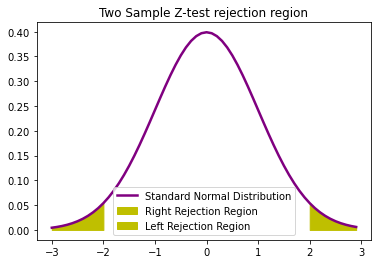

In [16]:
group_a = group_a.astype('float64')
group_b = group_b.astype('float64')
variance_con = np.var(group_a)
variance_exp = np.var(group_b)

# Pooled Variance
pooled_variance = np.sqrt(variance_con/N_con + variance_exp/N_exp)

# Test statistics
T = (mu_con-mu_exp)/np.sqrt(variance_con/N_con + variance_exp/N_exp)

# two sided test and using symmetry property of Normal distibution so we multiple with 2
p_value = norm.sf(T)*2

# Z-critical value
Z_crit  = norm.ppf(1-alpha/2)

# Margin of error
m = Z_crit*pooled_variance

# Confidence Interval
CI = [(mu_con - mu_exp) - m, (mu_con - mu_exp) + m]


print("Test Statistics stat: ", T)
print("Z-critical: ", Z_crit)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,2))

import matplotlib.pyplot as plt
z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'purple',linewidth = 2.5)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Right Rejection Region',color ='y' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'Left Rejection Region',color ='y' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()